### Assignment 2 :Data Preprocessing

The objective of this assignment is the students perform a preprocessing process on a dataset from the MIMIC-III database, which contains information
on in-hospital mortality from the monitoring of patients in the Intensive Care
Unit (ICU) for 48 hours..

In [252]:
# Import all necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [253]:
# Load the data from local drive using pandas

df = pd.read_csv(r"C:\Users\Lbundi\Desktop\Strathmore Lectures\Data\ihm_48_hours..csv")

In [254]:
# Display the first five rows to familiarize with data
df.head()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Patient_id,target
0,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,-11.396037,-19.976803,NaN,76.0,94.000000,17.0,116.0,36.388889,83.5,NaN,30552,0
1,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
2,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,-6.497052,18.0,116.0,36.388889,83.5,NaN,30552,0
3,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
4,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0


In [255]:
# display the size for the data

rows ,columns = df.shape
print(f'The Number of rows are:{rows}\nNo of columns are: {columns}')

The Number of rows are:300912
No of columns are: 19


#### Task 1

Enumeration of Variables: List the categorical variables, indicating which are binary and which are considered nominal. List the numerical
variables present in the data set.

In [256]:
# Check the data types of our dataframe

df.dtypes

Capillary refill rate                 float64
Diastolic blood pressure              float64
Fraction inspired oxygen              float64
Glascow coma scale eye opening         object
Glascow coma scale motor response      object
Glascow coma scale total              float64
Glascow coma scale verbal response     object
Glucose                               float64
Heart Rate                            float64
Height                                float64
Mean blood pressure                   float64
Oxygen saturation                     float64
Respiratory rate                      float64
Systolic blood pressure               float64
Temperature                           float64
Weight                                float64
pH                                    float64
Patient_id                             object
target                                  int64
dtype: object

In [257]:
# List categorical and Numerical  variables 

#Categorical vars
categorical_vars = df.select_dtypes(include=['object','string','bool']).columns.tolist()

# Numerical vars
numerical_vars   = df.select_dtypes(include=['float','int','complex']).columns.tolist()

print(f'The Categorical Columns are\n{categorical_vars}\n\nThe Numeical columns present are :\n{numerical_vars}\n',)


The Categorical Columns are
['Glascow coma scale eye opening', 'Glascow coma scale motor response', 'Glascow coma scale verbal response', 'Patient_id']

The Numeical columns present are :
['Capillary refill rate', 'Diastolic blood pressure', 'Fraction inspired oxygen', 'Glascow coma scale total', 'Glucose', 'Heart Rate', 'Height', 'Mean blood pressure', 'Oxygen saturation', 'Respiratory rate', 'Systolic blood pressure', 'Temperature', 'Weight', 'pH', 'target']



In [258]:
# Lets check for cardinality in our  columns to flag out binary 
# Cardinality is the no of elements unqiue elements or value in dataframe columns

for col in df.columns:
    cardinality = df[col].nunique()
    if cardinality == 2:
        print(col, cardinality)
        print(df[col].unique())
        
    

Capillary refill rate 2
[nan  0.  1.]
target 2
[0 1]


#### Task 2 

Initial Statistical Description: Carry out a statistical description of the variables before carrying out the cleaning process.

In [259]:
# We will use describe method in pandas to carry out statistical description

df.describe()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,6336.000000,296944.000000,88464.000000,184416.000000,300698.000000,300912.000000,55824.000000,296984.00000,300912.000000,300864.000000,300912.000000,298848.000000,221040.000000,230614.000000,300912.000000
mean,0.219223,62.541099,0.599884,10.818123,130.628329,79.447793,168.543422,78.79108,95.343460,18.731265,119.694213,36.832834,82.969018,5.573617,0.142128
std,0.413753,341.559624,0.253919,4.334923,84.171126,32.145920,15.137414,29.52986,2529.203751,6.884248,23.396042,1.000075,26.765857,5.963634,0.349182
min,0.000000,0.000000,0.000000,3.000000,-19.999974,-19.999623,0.000000,-34.00000,-19.999687,0.000000,0.000000,0.000000,0.000000,-19.999706,0.000000
25%,0.000000,51.000000,0.400000,8.000000,101.000000,70.000000,160.000000,68.00000,95.000000,15.000000,103.000000,36.277802,66.600000,7.310000,0.000000
50%,0.000000,59.000000,0.500000,11.000000,126.000000,84.000000,170.000000,77.00000,98.000000,18.000000,117.000000,36.833333,79.099998,7.370000,0.000000
75%,0.000000,69.000000,0.700000,15.000000,158.000000,97.000000,178.000000,88.00000,100.000000,22.000000,134.000000,37.388889,94.699997,7.420000,0.000000
max,1.000000,100105.010000,7.100000,15.000000,9999.000000,941.000000,203.000000,9381.00000,981023.000000,1211.000000,295.000000,73.760002,931.224376,99.000000,1.000000


**Some Summary conclusion of our stastics above**

1. Capillary Refill Rate: Most values are 0, with a small mean (0.219) and a maximum of 1, indicating that this variable is often either 0 or 1,  binary.

2. Diastolic Blood Pressure: The mean diastolic pressure is around 62.5 mmHg, but the wide standard deviation (341.56) and an extreme maximum value (100,105 mmHg) suggest the presence of outliers or erroneous data. The median (59 mmHg) and interquartile range (51–69 mmHg) show a more typical range of values.

3. Fraction of Inspired Oxygen: This variable has a mean of 0.60 and ranges from 0 to 7.1, but the 75th percentile is 0.7, indicating that higher values might be outiers.

4. Glasgow Coma Scale Total: The mean is approximately 10.8, with a range of 3 to 15. The median is 11, showing that most patients are moderately conscious.

5. Heart Rate: The mean heart rate is around 79.45 bpm, with a standard deviation of 32.15 bpm. Extreme values, including a minimum of -20 bpm and a maximum of 941 bpm, indicate possible data entry errors.

6. Mean Blood Pressure: The mean is about 78.79 mmHg, with a large range from -34 to 9381 mmHg, indicating possible outliers or errors. The typical range is within the interquartile range (68–88 mmHg).

7. Oxygen Saturation: The mean oxygen saturation is 95.34%, but the standard deviation is very large (2529.20%), indicating significant outliers, as the median and interquartile range are within expected physiological limits (95–100).

8. Height: The mean height is approximately 168.54 cm, with a small standard deviation (15.14 cm). The interquartile range (160–178 cm) and maximum of 203 cm reflect typical adult height distribution.



#### Task 3 

Identification of Outliers in Numerical Variables: Identify numerical variables that contain outliers. Support this detection with plots that illustrate the procedure used.

Outliers in Diastolic blood pressure:
19         98.0
20        105.0
21        102.0
22        101.0
23        101.0
          ...  
300050    133.0
300563    113.0
300844    107.0
300858     97.0
300859     97.0
Name: Diastolic blood pressure, Length: 6534, dtype: float64


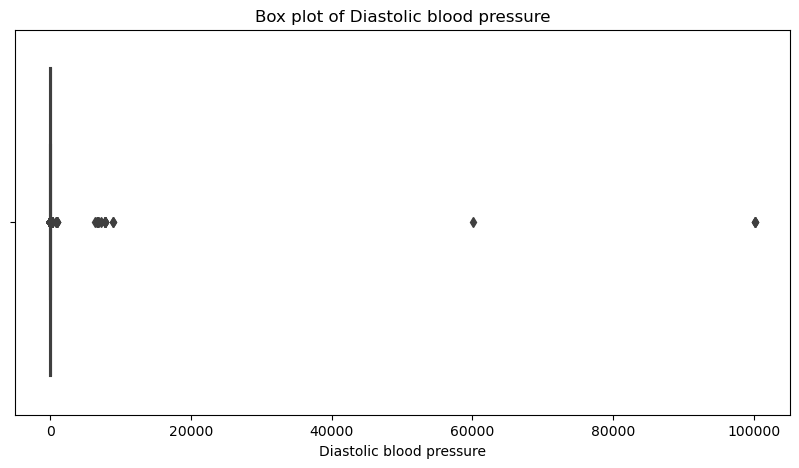

Outliers in Fraction inspired oxygen:
154157    7.1
154158    7.1
154159    7.1
154160    7.1
154161    7.1
154162    7.1
154163    7.1
154164    7.1
154165    7.1
154166    7.1
154167    7.1
154168    7.1
154169    7.1
154170    7.1
154171    7.1
154172    7.1
154173    7.1
154174    7.1
154175    7.1
Name: Fraction inspired oxygen, dtype: float64


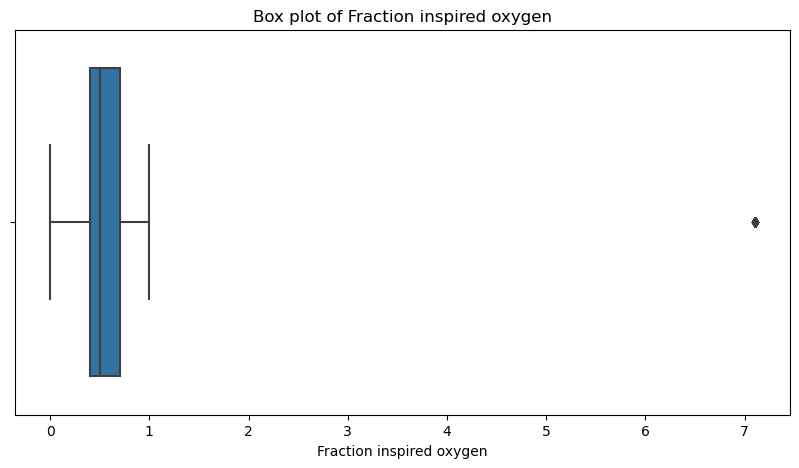

Outliers in Glascow coma scale total:
Series([], Name: Glascow coma scale total, dtype: float64)


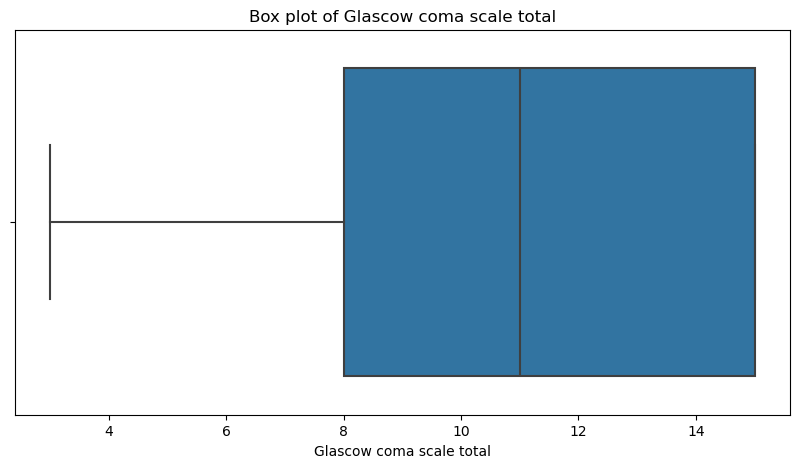

Outliers in Glucose:
0        -11.396037
32        -6.538410
38        -1.307305
41        -7.624986
47       -12.383672
            ...    
300821    -0.746087
300856    -2.466596
300857   -17.535523
300877   -10.763703
300883    -5.323467
Name: Glucose, Length: 38850, dtype: float64


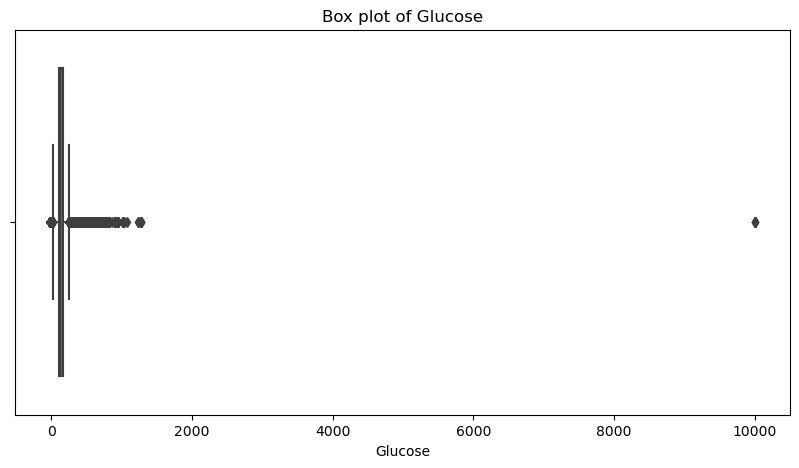

Outliers in Heart Rate:
0         -19.976803
8          -7.712106
9         -15.108502
12        -13.878836
25         -1.162812
             ...    
300866     -6.736484
300869    -12.069029
300871    140.000000
300872    140.000000
300873    140.000000
Name: Heart Rate, Length: 26889, dtype: float64


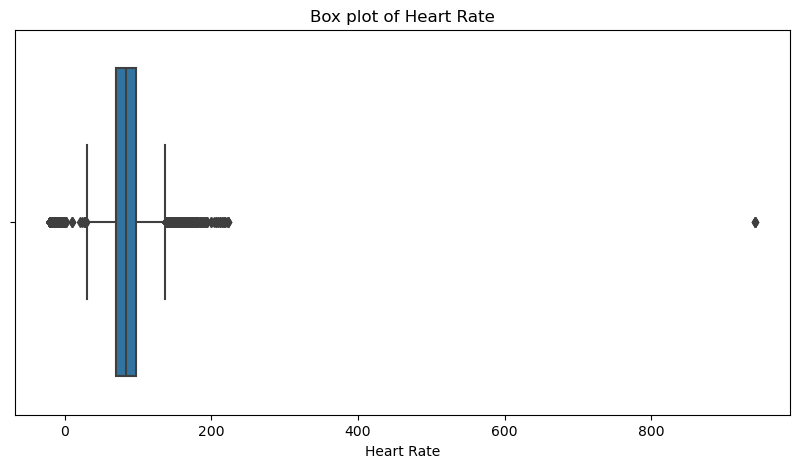

Outliers in Height:
77952     14.0
77953     14.0
77954     14.0
77955     14.0
77956     14.0
          ... 
294475    16.0
294476    16.0
294477    16.0
294478    16.0
294479    16.0
Name: Height, Length: 480, dtype: float64


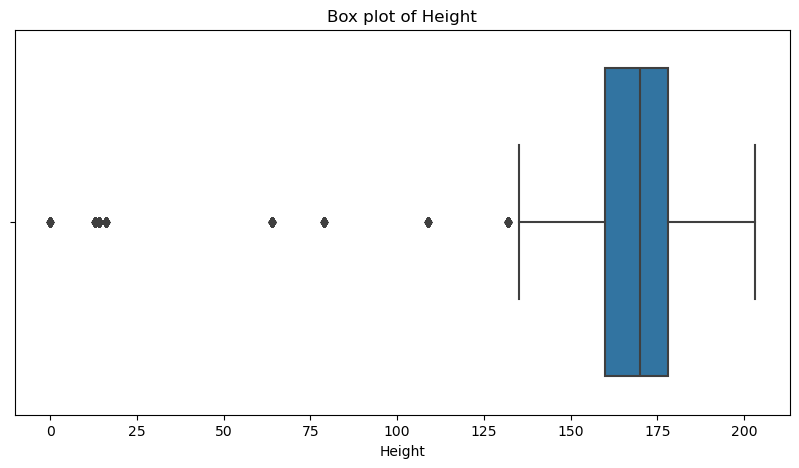

Outliers in Mean blood pressure:
26        126.0
27        130.0
28        130.0
52        138.0
53        144.0
          ...  
300559    131.0
300562    119.0
300626    226.0
300639     32.0
300640     32.0
Name: Mean blood pressure, Length: 5814, dtype: float64


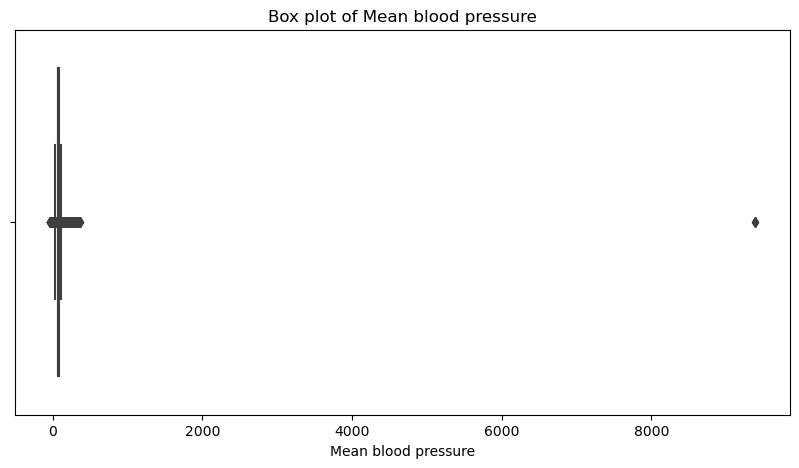

Outliers in Oxygen saturation:
2         -6.497052
11       -14.249816
14       -11.890584
15       -18.848392
16       -19.596744
            ...    
300801   -11.602246
300842    -2.388975
300863   -15.449956
300864   -16.919171
300869   -14.206175
Name: Oxygen saturation, Length: 27454, dtype: float64


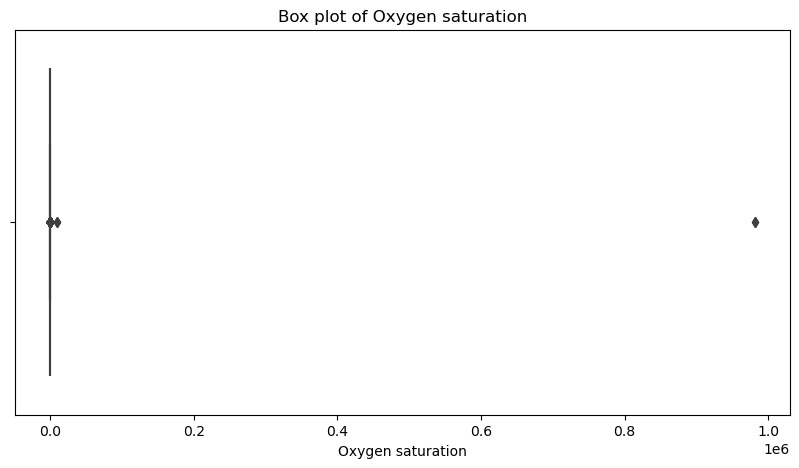

Outliers in Respiratory rate:
48         4.0
98         0.0
99         0.0
100        0.0
101        0.0
          ... 
300870    36.0
300900    46.0
300901    40.0
300903    37.0
300906    33.0
Name: Respiratory rate, Length: 11700, dtype: float64


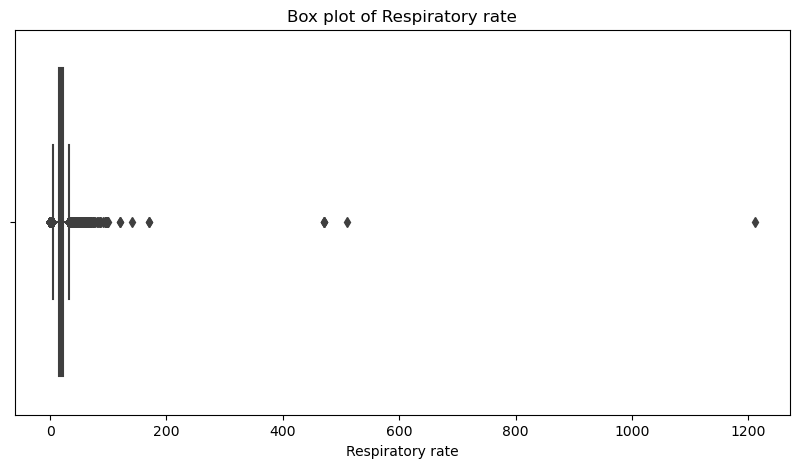

Outliers in Systolic blood pressure:
52        187.0
53        205.0
54        201.0
55        190.0
56        190.0
          ...  
300559    202.0
300562    191.0
300773    198.0
300774    193.0
300859    181.0
Name: Systolic blood pressure, Length: 4113, dtype: float64


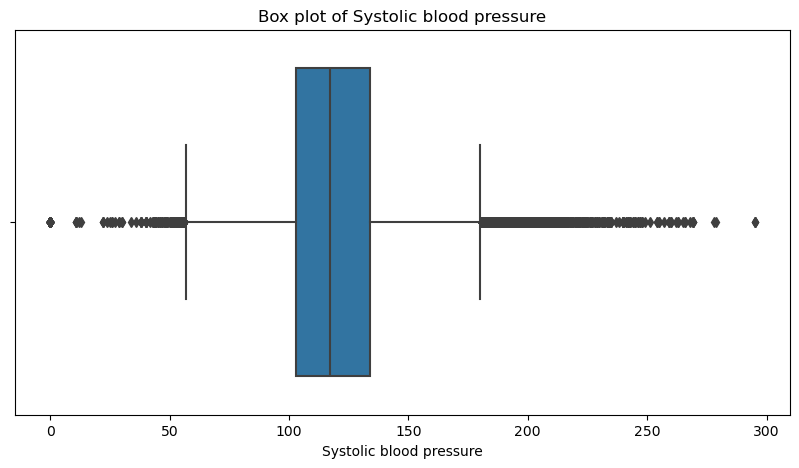

Outliers in Temperature:
336       32.900000
337       32.900000
338       32.900000
339       32.900000
340       32.900000
            ...    
300899    39.444444
300900    39.722222
300901    39.722222
300902    39.222221
300903    39.222221
Name: Temperature, Length: 6050, dtype: float64


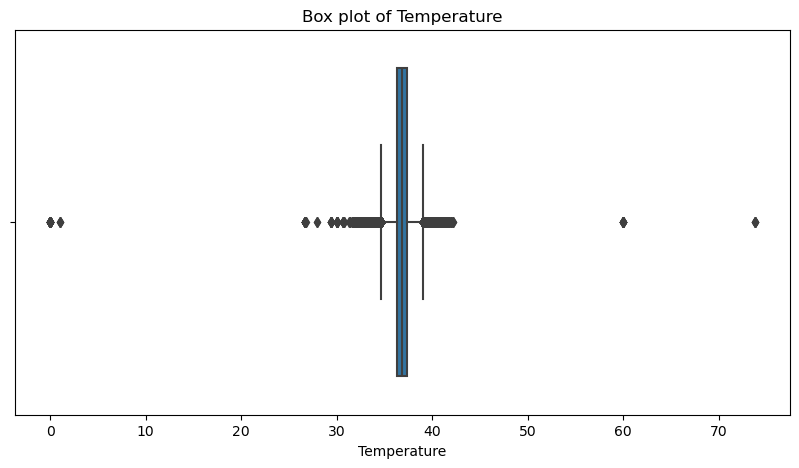

Outliers in Weight:
346         0.997902
347         0.997902
348         0.997902
349         0.997902
350         0.997902
             ...    
298267    142.000000
298268    142.000000
298269    142.000000
298270    142.000000
298271    142.000000
Name: Weight, Length: 6899, dtype: float64


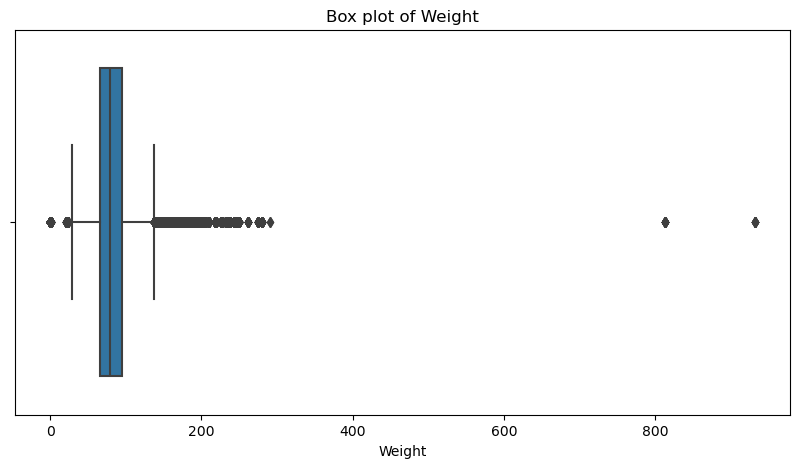

Outliers in pH:
51        -0.006984
65        -9.057983
66       -19.544852
103       -0.880544
107       -4.370890
            ...    
300871   -17.668751
300879   -16.367851
300888   -17.234700
300893   -18.611252
300901    -8.091018
Name: pH, Length: 26761, dtype: float64


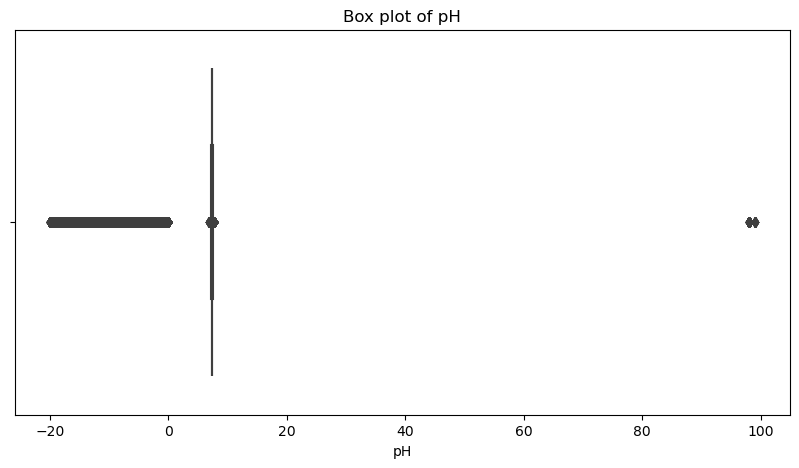

In [260]:
# To identify outlier we can use IQR Method and support that with box plot visualization.
# Numerical variable 

numerical_cols = df.select_dtypes(include=['float'])

# Function to calculate IQR and identify outliers
def identify_outliers(col):
    
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return col[(col < lower_bound) | (col > upper_bound)]

# Detecting outliers for each numerical column and plotting box plots to proof

for col in numerical_vars:
    if col not in ['Capillary refill rate','target']: # remove columns with binary types
        
        outliers = identify_outliers(df[col])
        print(f"Outliers in {col}:")
        print(outliers)
        
        # Plotting box plot
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
        plt.show()

#### Task 4

Elimination of Records with Incomplete Values: Delete records that contain incomplete values in categorical variables. Document this process through screenshots of the applied filter and the resulting variables after the operation.

In [261]:
# Check incomplete records in the categorical vars

print(f'Missing Variables')
print(df[categorical_vars].isna().sum())

# Display dataset before elimination
print("\nDataset before elimination of incomplete records:")
print(df[categorical_vars].info())


# Eliminate records with incomplete values in categorical columns
df = df.dropna(subset=categorical_vars)

# Display dataset after elimination
print(df[categorical_vars].isna().sum())
print("Dataset after elimination of incomplete records:")
print(df[categorical_vars].info())

Missing Variables
Glascow coma scale eye opening        26722
Glascow coma scale motor response      3934
Glascow coma scale verbal response     4028
Patient_id                                0
dtype: int64

Dataset before elimination of incomplete records:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300912 entries, 0 to 300911
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Glascow coma scale eye opening      274190 non-null  object
 1   Glascow coma scale motor response   296978 non-null  object
 2   Glascow coma scale verbal response  296884 non-null  object
 3   Patient_id                          300912 non-null  object
dtypes: object(4)
memory usage: 9.2+ MB
None
Glascow coma scale eye opening        0
Glascow coma scale motor response     0
Glascow coma scale verbal response    0
Patient_id                            0
dtype: int64
Dataset after eliminatio

In [262]:
df.sample(10)

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Patient_id,target
48874,NaN,59.0,NaN,1 No Response,1 No Response,3.0,1.0 ET/Trach,160.0,110.000000,NaN,70.0,87.000000,16.0,94.0,34.944445,125.000000,7.25,19013,0
141740,NaN,51.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,111.0,-15.415705,NaN,59.0,100.000000,24.0,88.0,36.611112,NaN,7.35,20426,0
187603,NaN,58.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,147.0,-1.672904,NaN,75.0,93.000000,17.0,109.0,37.000000,44.799999,NaN,150_e,0
263528,NaN,73.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,109.0,81.000000,NaN,92.0,97.000000,11.0,113.0,37.000000,NaN,NaN,18059,0
47917,NaN,46.0,0.5,Spontaneously,Obeys Commands,NaN,Oriented,146.0,116.000000,NaN,62.0,94.000000,21.0,108.0,35.777778,83.007336,7.51,81247,0
25268,NaN,56.0,NaN,3 To speech,6 Obeys Commands,10.0,1.0 ET/Trach,95.0,-16.688532,NaN,72.0,100.000000,14.0,111.0,38.222224,NaN,7.51,9803_,0
204085,NaN,40.0,0.8,To Speech,Localizes Pain,NaN,No Response-ETT,94.0,99.000000,NaN,56.0,-15.914597,36.0,92.0,36.555556,94.301777,7.31,55585,1
237031,NaN,61.0,NaN,4 Spontaneously,6 Obeys Commands,15.0,5 Oriented,140.0,100.000000,NaN,76.0,94.000000,27.0,109.0,36.611112,NaN,7.43,2167_,0
59214,NaN,60.0,NaN,To Speech,Obeys Commands,NaN,Confused,140.0,68.000000,160.0,80.0,100.000000,19.0,143.0,35.722222,64.700000,NaN,54613,0
178090,NaN,45.0,NaN,1 No Response,1 No Response,3.0,1.0 ET/Trach,119.0,71.000000,NaN,58.0,97.000000,16.0,84.0,35.400002,88.800003,7.30,32321,0


#### Task 5

Treatment of Outliers and Missing Values in Numerical Variables: Delete values considered outliers in numerical variables. Replace missing values with central tendency values.

In [263]:
#Identify and Replace Missing Values
for col in numerical_vars:
    if df[col].isnull().sum() > 0:
        # Replace missing values with the median > other central tendency values 
        df[col].fillna(df[col].median(), inplace=True)



# Identify and Remove Outliers
def remove_outliers(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


for col in numerical_vars:
    if col not in ['Capillary refill rate','target']: # remove columns with binary types
        df = remove_outliers(df, col)



#### Task 6

Post-Processing Statistical Description: Recalculate the statistical description of the variables. Verify that the data set does not contain
outliers or missing values

In [264]:
# Display the updated statistical summary
print("Updated Statistical Summary:")
df.describe()

Updated Statistical Summary:


,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,target
count,99902.000000,99902.000000,99902.0,99902.000000,99902.000000,99902.000000,99902.0,99902.000000,99902.000000,99902.000000,99902.000000,99902.000000,99902.000000,99902.000000,99902.000000
mean,0.006166,59.197574,0.5,11.102260,131.759464,85.464675,170.0,77.596344,97.635753,18.167694,118.670377,36.884060,78.644294,7.381292,0.122090
std,0.078282,12.665205,0.0,3.919329,36.735891,17.495942,0.0,13.516939,2.401698,5.524646,21.101124,0.763621,8.770374,0.050335,0.327391
min,0.000000,24.000000,0.5,3.000000,17.000000,30.000000,170.0,39.666698,88.000000,2.000000,58.000000,34.777778,57.500000,7.240000,0.000000
25%,0.000000,50.000000,0.5,9.000000,105.000000,73.000000,170.0,68.000000,96.000000,14.000000,103.000000,36.333334,76.000000,7.370000,0.000000
50%,0.000000,59.000000,0.5,11.000000,126.000000,84.000000,170.0,77.000000,98.000000,18.000000,117.000000,36.888901,79.099998,7.370000,0.000000
75%,0.000000,67.000000,0.5,15.000000,153.000000,97.000000,170.0,87.000000,100.000000,22.000000,133.000000,37.400002,79.800003,7.410000,0.000000
max,1.000000,96.000000,0.5,15.000000,240.000000,137.000000,170.0,115.333000,100.000000,34.000000,178.000000,39.000000,101.500000,7.510000,1.000000


#### Task 7

Analysis of Advantages and Disadvantages: Perform an analysis that
evaluates the advantages and disadvantages of the data preprocessing
process carried out. Provide an evaluation of the results obtained.

Advantage